<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_17_CaloriesBurnt/Calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (9).zip to archive (9).zip


In [3]:
import zipfile

with zipfile.ZipFile('archive (9).zip','r') as zip_ref:
  zip_ref.extractall('calorie_data')

import os
print(os.listdir('calorie_data'))

['calories.csv', 'exercise.csv']


In [5]:
cal = pd.read_csv('calorie_data/calories.csv')
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exe = pd.read_csv('calorie_data/exercise.csv')
exe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
df = pd.concat([exe,cal['Calories']],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
df.shape

(15000, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [14]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


<Axes: xlabel='Gender', ylabel='count'>

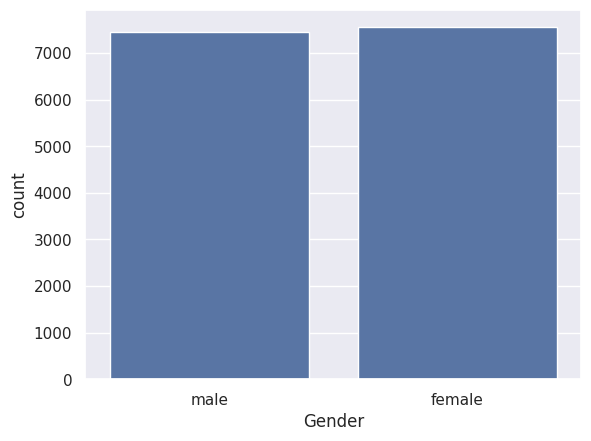

In [17]:
sns.set()
sns.countplot(x=df['Gender'])

/tmp/ipython-input-18-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

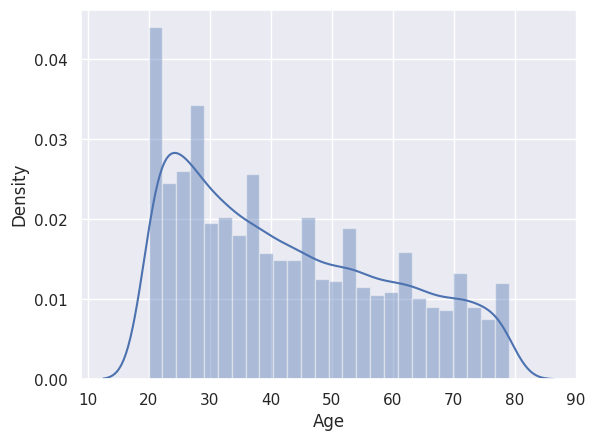

In [18]:
sns.distplot(df['Age'])

/tmp/ipython-input-19-3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

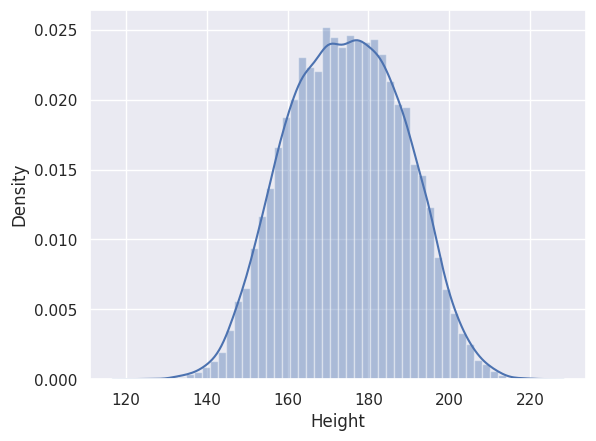

In [19]:
sns.distplot(df['Height'])

/tmp/ipython-input-20-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

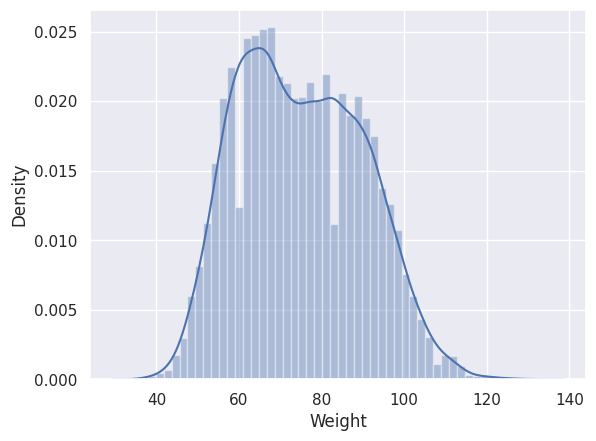

In [20]:
sns.distplot(df['Weight'])

In [27]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

/tmp/ipython-input-27-1088024582.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [28]:
correlation = df.corr()

<Axes: >

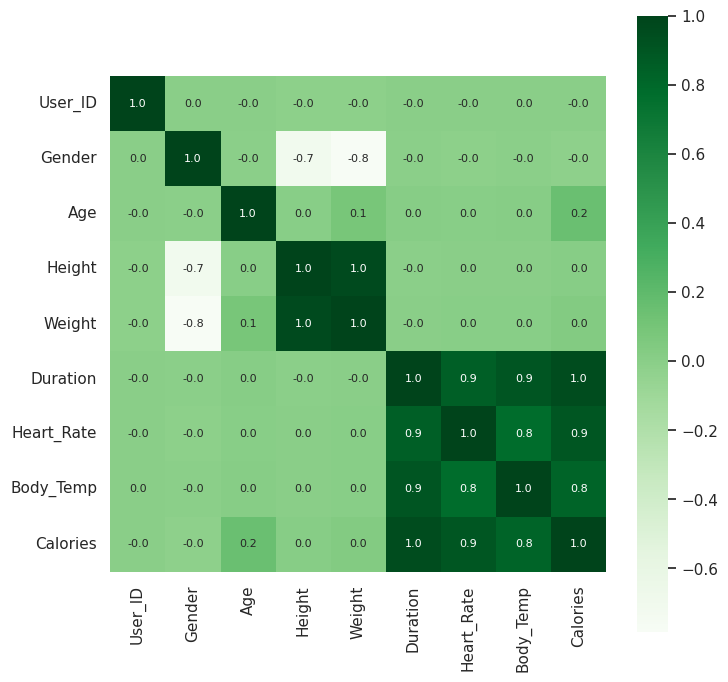

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [32]:
X = df.drop(['User_ID','Calories'],axis=1)
Y = df['Calories']

In [33]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
models = {
    'RandomForest' : RandomForestRegressor(n_estimators=100),
    'LogisticRegression' : LinearRegression(),
    'XGBoost' : XGBRegressor(eval_metric='logloss')
}

In [36]:
import time

best_model = None
best_name = None
best_score = 0
for name , model in models.items():
    print(name)
    start = time.time()
    model.fit(X_train,Y_train)
    preds = model.predict(X_test)
    end = time.time()
    print('duration:',end-start)
    score = metrics.r2_score(Y_test, preds)
    if score > best_score:
        best_score = score
        best_model = model
        best_name = name
    print('Score:',score)
    print()

print("Best model:", best_name)
print("Best score:", best_score)

RandomForest
duration: 6.398114204406738
Score: 0.9981737805517931

LogisticRegression
duration: 0.022078752517700195
Score: 0.9668790377181355

XGBoost
duration: 0.2996242046356201
Score: 0.998800624504713

Best model: XGBoost
Best score: 0.998800624504713
